### 1)  Time Series of COVID Cases and Travel Volume (Overlay 2019 and 2020) in USA
### 2)  Time Series of COVID Cases and Travel Volume(Pick 2 states, e.g. CA, VT) 

### 3) State Specific Bar Graph showing travel before / travel after , potentially all 50 states

### 4) Time Series of Trip Type over Time (Nationally)

### 5) Change in percentage of travel -statewise                                                                        Owner: Mandakini

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

In [3]:
#read data file
path = "output_data/consolidated_new.csv"
consolidated_covid_df = pd.read_csv(path, encoding="UTF-8")



# Time Series of COVID Cases and Travel Volume (Overlay 2019 and 2020) in USA

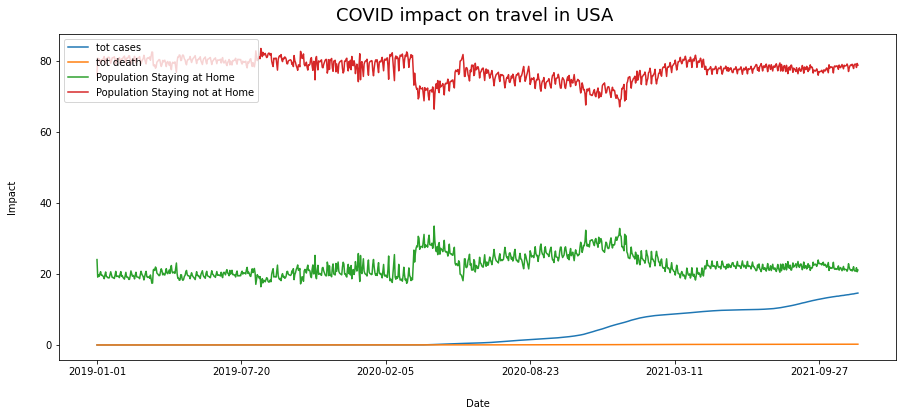

In [4]:
# preparing dataframes 

N1 = consolidated_covid_df.groupby("Date",as_index = False)["tot_cases%"].mean() 
N1_df = pd.DataFrame(N1)

N2 = consolidated_covid_df.groupby("Date",as_index = False)['tot_death%'].mean() 
N2_df = pd.DataFrame(N2)

N3 =  consolidated_covid_df.groupby("Date",as_index = False)['Population Staying at Home%'].mean() 
N3_df = pd.DataFrame(N3)

N4 =  consolidated_covid_df.groupby("Date",as_index = False)['Population Not Staying at Home%'].mean() 
N4_df = pd.DataFrame(N4)

# plotting line graph

N1_df.set_index('Date')['tot_cases%'].plot(figsize =(15,6),label="tot cases")
N2_df.set_index('Date')['tot_death%'].plot(figsize =(15,6),label="tot death")
N3_df.set_index('Date')['Population Staying at Home%'].plot(figsize =(15,6),label="Population Staying at Home")
N4_df.set_index('Date')['Population Not Staying at Home%'].plot(figsize =(15,6),label="Population Staying not at Home")

plt.legend(loc="upper left")

plt.ylabel("Impact",labelpad = 22)
plt.xlabel("Date",labelpad = 22)

plt.title("COVID impact on travel in USA ",y=1.02,fontsize=18)
plt.show()


## 2) Time Series of COVID Cases and Travel Volume(Pick 2 states, e.g. CA, VT)

In [5]:
#Which States reacted most/least aggressively to COVID
#(Pick 2 states, e.g. CA, VT)

#preparing dataframe
CA_df = consolidated_covid_df.loc[(consolidated_covid_df['state'] == 'CA')]
VT_df = consolidated_covid_df.loc[(consolidated_covid_df['state'] == 'VT')]

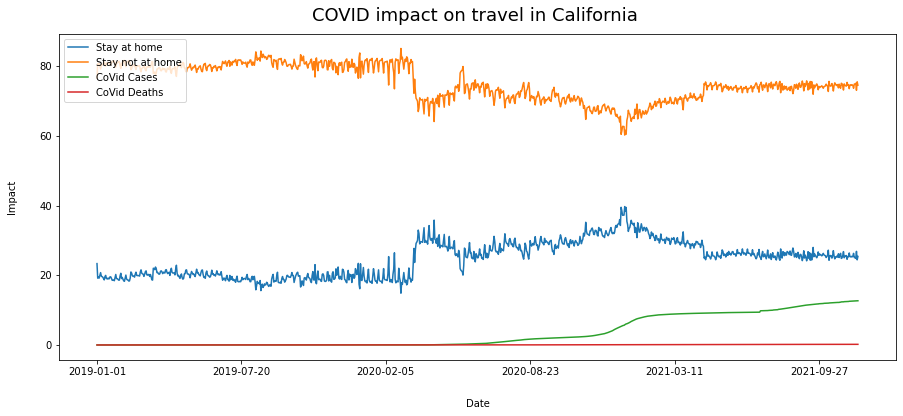

In [6]:
#plot line graph for CA
CA_df.set_index('Date')['Population Staying at Home%'].plot(figsize =(15,6),label="Stay at home")
CA_df.set_index('Date')['Population Not Staying at Home%'].plot(figsize =(15,6),label="Stay not at home")
CA_df.set_index('Date')['tot_cases%'].plot(figsize =(15,6),label="CoVid Cases")
CA_df.set_index('Date')['tot_death%'].plot(figsize =(15,6),label="CoVid Deaths")

plt.legend(loc="upper left")

plt.ylabel("Impact",labelpad = 22)
plt.xlabel("Date",labelpad = 22)

plt.title("COVID impact on travel in California ",y=1.02,fontsize=18)
plt.show()

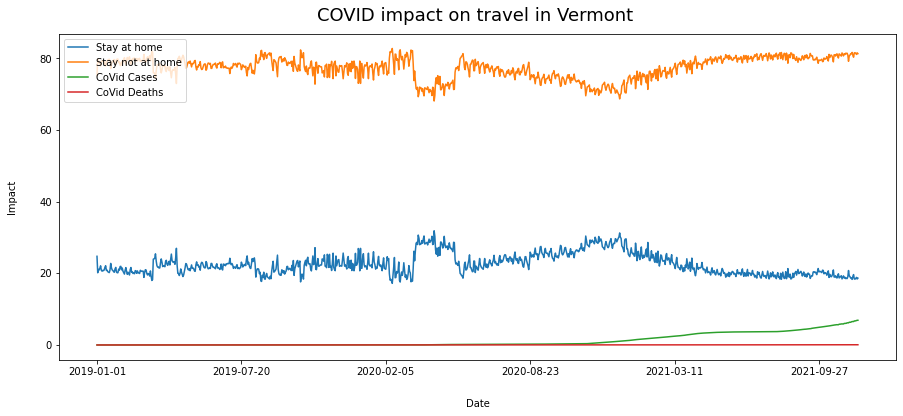

In [7]:
#plot line graph for VT
VT_df.set_index('Date')['Population Staying at Home%'].plot(figsize =(15,6),label="Stay at home")
VT_df.set_index('Date')['Population Not Staying at Home%'].plot(figsize =(15,6),label="Stay not at home")
VT_df.set_index('Date')['tot_cases%'].plot(figsize =(15,6),label="CoVid Cases")
VT_df.set_index('Date')['tot_death%'].plot(figsize =(15,6),label="CoVid Deaths")

plt.legend(loc="upper left")

plt.ylabel("Impact",labelpad = 22)
plt.xlabel("Date",labelpad = 22)

plt.title("COVID impact on travel in Vermont ",y=1.02,fontsize=18)
plt.show()

## 3. State Specific Bar Graph showing travel before / travel after potentially all 50 states

In [8]:


#Adding a new column "covid_status" according  to "Date" ,if date is before 2020/01/21 status is before otherwise after

consolidated_covid_df["covid_status"] = np.where(consolidated_covid_df["Date"]>'2020/01/21 status is ',"after","before")

consolidated_covid_df.head(3)

,state,tot_cases,tot_death,Level,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,...,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,total_population,tot_cases%,tot_death%,Population Staying at Home%,Population Not Staying at Home%,covid_status
0,MO,0,0,NaN,2019-01-01,1530765.0,4576960.0,16618431.0,4033851.0,4385048.0,...,290444.0,154169.0,39949.0,29170.0,6107725.0,0.0,0.0,25.062769,74.937231,before
1,LA,0,0,NaN,2019-01-01,1042471.0,3603260.0,13635299.0,3737562.0,3653640.0,...,249210.0,97879.0,22007.0,14093.0,4645731.0,0.0,0.0,22.439332,77.560668,before
2,AZ,0,0,NaN,2019-01-01,1721026.0,5428700.0,18705619.0,5351386.0,4462153.0,...,278933.0,190394.0,39342.0,43397.0,7149726.0,0.0,0.0,24.071216,75.928784,before


In [9]:
# groupby  Number of Trips on state and covid_status ,use sum function to generate following dataframe "covid_vs_trips_df"
#"covid_vs_trips_df" with columns state,covid_status,Number of Trips
x = consolidated_covid_df.groupby(["state","covid_status"],as_index = False)['Number of Trips'].sum()
covid_vs_trips_df = pd.DataFrame(x)

In [10]:
covid_vs_trips_df

,state,covid_status,Number of Trips
0,AK,after,9.103217e+08
1,AK,before,2.007567e+09
2,AL,after,5.675018e+09
3,AL,before,1.189436e+10
4,AR,after,3.404353e+09
...,...,...,...
97,WI,before,1.520846e+10
98,WV,after,2.109076e+09
99,WV,before,4.455022e+09
100,WY,after,8.282265e+08


Text(0.5, 1.0, 'Statewise Number of trips before ,after COVID')

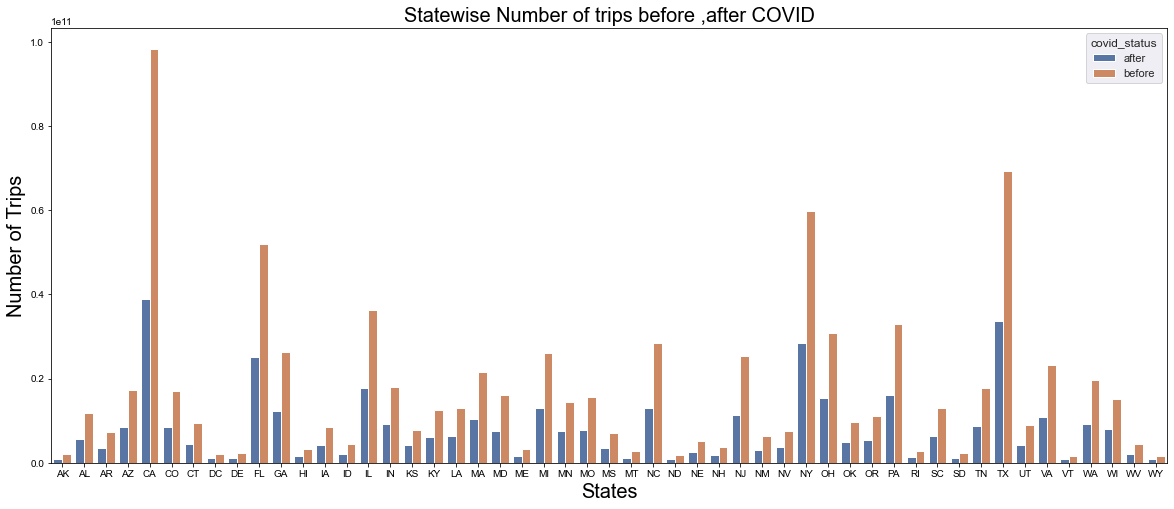

In [11]:
#plot bar graph
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set()
p = sns.barplot(x="state", y="Number of Trips",data = covid_vs_trips_df,hue='covid_status',ax=ax)
p.set_xlabel("States", fontsize = 20)
p.set_ylabel("Number of Trips", fontsize = 20)
p.set_title("Statewise Number of trips before ,after COVID", fontsize = 20)


## 4) Time Series of Trip Type over Time (Nationally)

In [12]:
#Read data
national_trip_data = "output_data/national_covid.csv"

In [13]:
#preparing dataframe
national_trip_data = pd.read_csv(national_trip_data, encoding="UTF-8")

In [25]:
national_trip_data.head(3)

,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,2019/01/01,77433867.0,248733553.0,8.977844e+08,241667151.0,234284795.0,108078903.0,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0
1,2019/01/02,61305201.0,264862219.0,1.139452e+09,291276735.0,285887315.0,138039296.0,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0
2,2019/01/03,63050480.0,263116940.0,1.162753e+09,296375014.0,290074425.0,140771581.0,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0


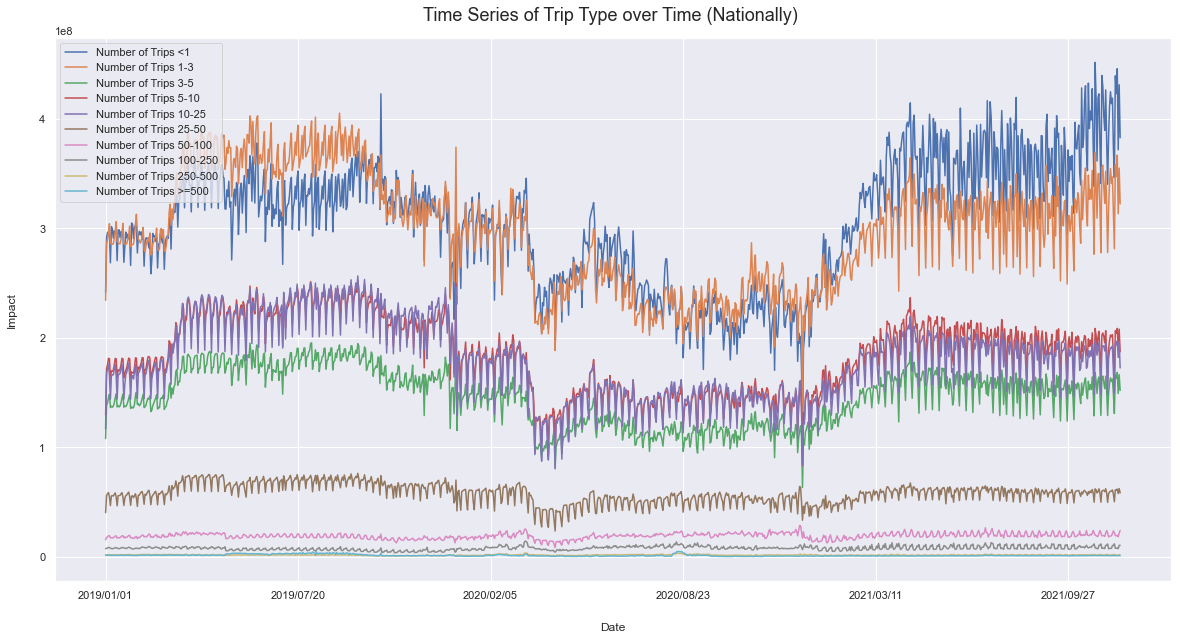

In [26]:
# plot line graph for different trip type with date

national_trip_data.set_index('Date')['Number of Trips <1'].plot(figsize =(20,10),label="Number of Trips <1")
national_trip_data.set_index('Date')['Number of Trips 1-3'].plot(figsize =(20,10),label="Number of Trips 1-3")
national_trip_data.set_index('Date')['Number of Trips 3-5'].plot(figsize =(20,10),label="Number of Trips 3-5")
national_trip_data.set_index('Date')['Number of Trips 5-10'].plot(figsize =(20,10),label="Number of Trips 5-10")
national_trip_data.set_index('Date')['Number of Trips 10-25'].plot(figsize =(20,10),label="Number of Trips 10-25")
national_trip_data.set_index('Date')['Number of Trips 25-50'].plot(figsize =(20,10),label="Number of Trips 25-50")
national_trip_data.set_index('Date')['Number of Trips 50-100'].plot(figsize =(20,10),label="Number of Trips 50-100")
national_trip_data.set_index('Date')['Number of Trips 100-250'].plot(figsize =(20,10),label="Number of Trips 100-250")
national_trip_data.set_index('Date')['Number of Trips 250-500'].plot(figsize =(20,10),label="Number of Trips 250-500")
national_trip_data.set_index('Date')['Number of Trips >=500'].plot(figsize =(20,10),label="Number of Trips >=500")


plt.legend(loc="upper left")

plt.ylabel("Impact",labelpad = 22)
plt.xlabel("Date",labelpad = 22)

plt.title("Time Series of Trip Type over Time (Nationally) ",y=1.02,fontsize=18)
plt.show()

## 5) Change in percentage of travel COVID before - COVID after -Statewise

In [17]:
#before covid number of trips statewise
covid_before_trips_df = covid_vs_trips_df.loc[(covid_vs_trips_df['covid_status'] == 'before')]
covid_before_trips_df = covid_before_trips_df.rename(columns={'Number of Trips': 'Number of Trips_before'})
covid_before_trips_df.head(3)

,state,covid_status,Number of Trips_before
1,AK,before,2.007567e+09
3,AL,before,1.189436e+10
5,AR,before,7.331032e+09


In [18]:
#after covid number of trips statewise
covid_after_trips_df = covid_vs_trips_df.loc[(covid_vs_trips_df['covid_status'] == 'after')]
covid_after_trips_df = covid_after_trips_df.rename(columns={'Number of Trips': 'Number of Trips_after'})
covid_after_trips_df.head(3)

,state,covid_status,Number of Trips_after
0,AK,after,9.103217e+08
2,AL,after,5.675018e+09
4,AR,after,3.404353e+09


In [19]:
#combined dataframe containing Number of trips before covid and Number of trips after covid
covid_vs_trip_before_after = covid_before_trips_df.merge(covid_after_trips_df, left_on='state', right_on='state', how = "inner")

In [20]:
covid_vs_trip_before_after.head(3)

,state,covid_status_x,Number of Trips_before,covid_status_y,Number of Trips_after
0,AK,before,2.007567e+09,after,9.103217e+08
1,AL,before,1.189436e+10,after,5.675018e+09
2,AR,before,7.331032e+09,after,3.404353e+09


In [21]:
covid_vs_trip_before_after = covid_vs_trip_before_after.drop(columns=['covid_status_x', 'covid_status_y'])

In [22]:
covid_vs_trip_before_after.head(3)

,state,Number of Trips_before,Number of Trips_after
0,AK,2.007567e+09,9.103217e+08
1,AL,1.189436e+10,5.675018e+09
2,AR,7.331032e+09,3.404353e+09


In [23]:
#change_in_% of trips after covid = Number of Trips_after -Number of Trips_before / Number of Trips_before *100
covid_vs_trip_before_after['change_in_%']=(covid_vs_trip_before_after['Number of Trips_after']-covid_vs_trip_before_after['Number of Trips_before'] )/ covid_vs_trip_before_after['Number of Trips_before']  * 100

In [24]:
covid_vs_trip_before_after.head(3)

,state,Number of Trips_before,Number of Trips_after,change_in_%
0,AK,2.007567e+09,9.103217e+08,-54.655468
1,AL,1.189436e+10,5.675018e+09,-52.288169
2,AR,7.331032e+09,3.404353e+09,-53.562434


Text(0.5, 1.0, 'Change_in_percentage of travel after COVID - Statewise')

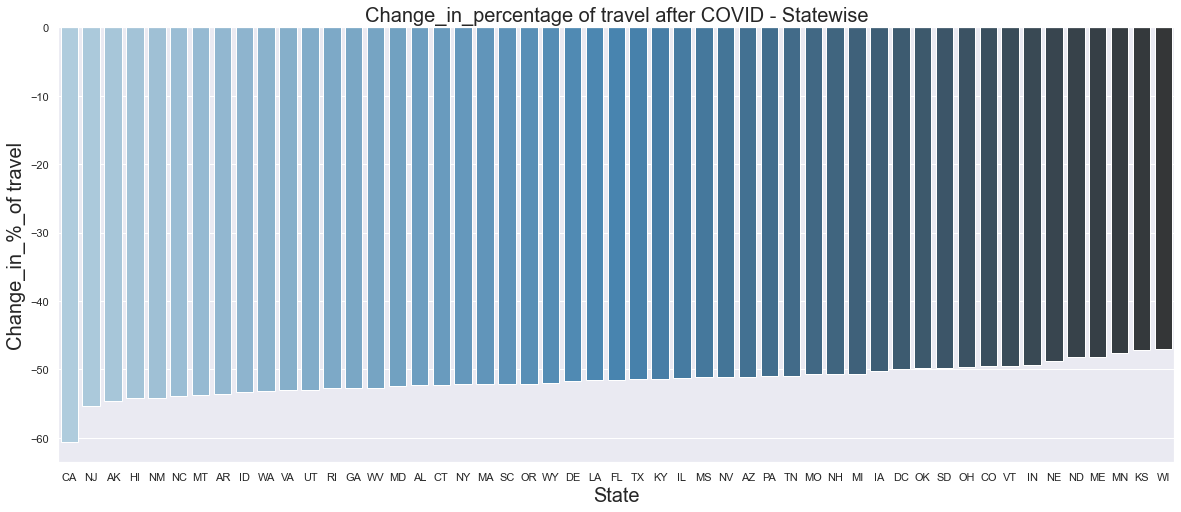

In [33]:
# generate graph

#sort data
covid_vs_trip_before_after.sort_values('change_in_%',inplace=True)

fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set()
p = sns.barplot(x="state", y="change_in_%",data = covid_vs_trip_before_after,ax=ax,palette="Blues_d")
p.set_xlabel("State", fontsize = 20)
p.set_ylabel("Change_in_%_of travel", fontsize = 20)
p.set_title("Change_in_percentage of travel after COVID - Statewise", fontsize = 20)
